# 💸Loan Application Status Prediction💸
        Build predictive models to automate the selection process for the right applicant.
        
 ![money](https://media4.giphy.com/media/yUGttwoLcXO92/giphy.gif)

## Business Problem :
### Banking uses manual procedures to determine if a borrower is suitable for a loan based on the results. Manual procedures were mostly effective, but were not sufficient when there were a large number of loan applications. At that time, it can take a long time to make a decision. As a result, a machine learning model for loan forecasting can be used to assess customer loan status and build strategies.

## Dataset Description
### Dataset has information about loan applicants data such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others

## Attribute Information :

- Loan_ID : Unique Loan ID

- Gender : Applicant's Gender (Male/ Female)

- Married : Marital status((Y/N))

- Dependents : Number of dependents

- Education : Applicant Education (Graduate/ Under Graduate)

- ApplicantIncome : Applicant's Income

- CoapplicantIncome : Coapplicant's Income

- LoanAmount : Loan Amount in thousands

- Loan_Amount_Term : Term of loan in months

- Credit_History : Credit_History of applicant

- Property_Area : Urban/ Semi Urban/ Rural

- Loan_Status : lLoan approved (Y/N)

## Target Variable:

- Loan_Status

# Problem Definition:

### You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 
![loan](https://38.media.tumblr.com/c38b4e350ec3b9eaa902ee13088dcb31/tumblr_mtgk5qmUTw1qfvzayo1_500.gif)


# Import Libraries

In [1]:
# Import Neccessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Collection and Information

In [2]:
# read the data
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# checking the shape of the dataset
df.shape    

(614, 13)

#### Dataset has 614 Rows and 13 Columns

In [4]:
#lets check the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 <p>We can see that the input variables are a mixture of numerical and categorical or ordinal data types, 8 columns which are categorical and 5 numerical and Our target variable is <b>Loan Status</b>. The non-numerical columns are represented using strings. At a minimum, the categorical variables will need to be ordinal or one-hot encoded.</p>

# Exploratory Data Analysis

In [5]:
#Lets check the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dataset columns <b> Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History</b> have missng values.

### Data Imputation

In [6]:
# Imputing missing values

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [7]:
# Check missing values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Yay!! we don't have any null values in our dataset

In [8]:
# count of unique values in dataset
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
# Type converston from float to int :

df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
df['Credit_History']=df['Credit_History'].astype('int')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int')

In [10]:
# let's see loan status as per Credit History
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,95,44,139
1,97,378,475
All,192,422,614


#### Applicants with credit history of 1 are more eligible for loan.

In [11]:
# value count of target variable
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### Dataset is imbalanced. We will overcome this later.

In [12]:
# let's check duplicate values
df.duplicated().sum()

0

#### Yay! No duplicates!

In [13]:
#value count of "Dependent" Column
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### Model will not be feasible with 3+, so, we will replace it with 4

In [14]:
# Replacing 3+ with 4 
df=df.replace(to_replace='3+', value=4)

In [15]:
# Drop ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

In [16]:
# Dataset Statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.412162,342.000000,0.773616
std,6109.041673,2926.24876,84.037468,64.372489,0.418832
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


# EDA Concluding Remarks
- Target Variable is imbalanced with 422 yes and 192 No value count.
- Applicant income ranges between 150 and 81000.
- Loan amount is between 9 and 700.
- Dataset columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History had missng values,we imputed them with their respective mode and mean.
- Applicants with credit history of 1 are more eligible for loan.
- The categorical variables will need to be ordinal or one-hot encoded.

# Data Visualization

In [17]:
# grouping categorical columns
cat_cols = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num_cols = [y for y in df.columns if df[y].dtypes!='O']

### Univariate Analysis

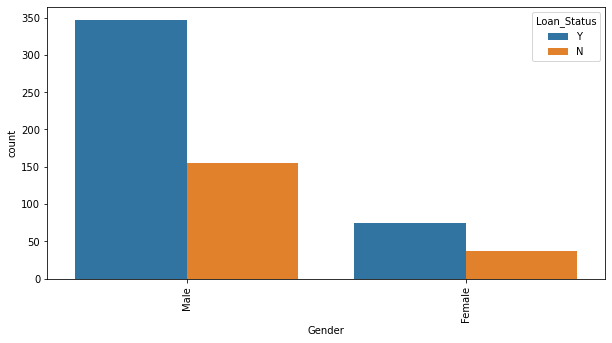

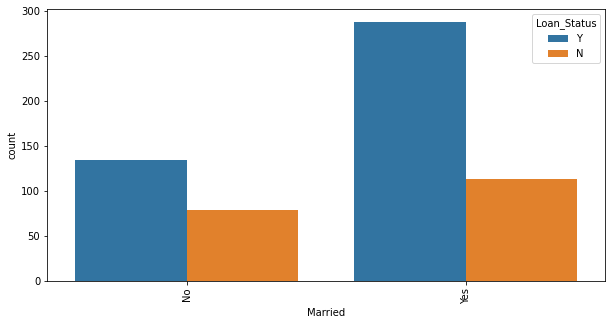

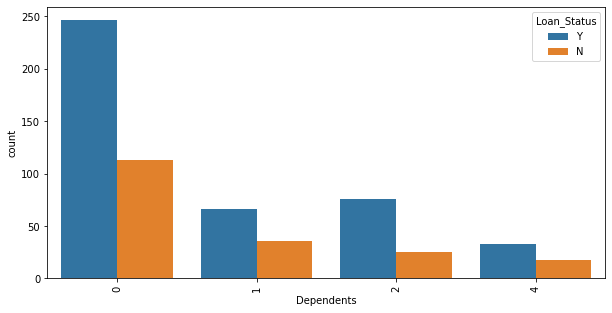

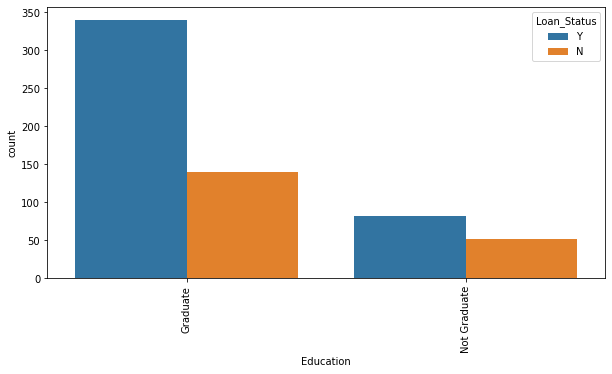

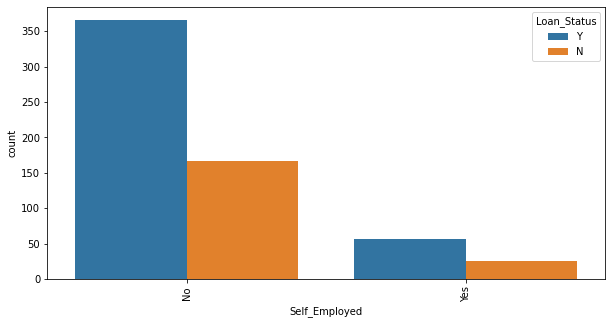

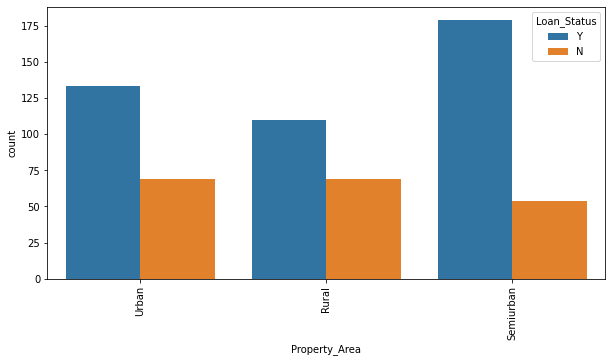

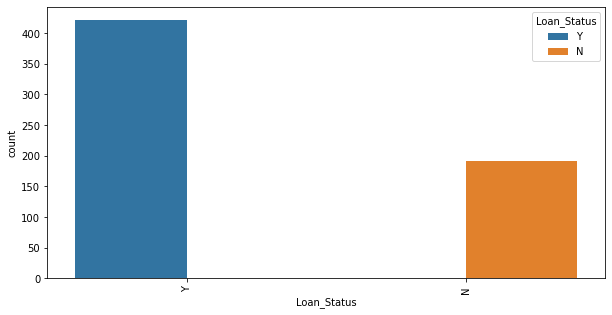

In [18]:
for i in df[cat_cols]:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=df,hue='Loan_Status')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### Observations:
- More number of males have applied for loan than females.
- More number of "married" people have applied for loan than females.
- More number of "Graduate" people have applied for loan.
- More number of people "Semiurban" and "Urban" area have applied for loan.
- Maximum number of "self employed" people have applied for loan.
- Maximum people who are "Not self employed", who have applied for loan, loan approval is almost equal for both the cases.
- In most of the cases if the person is educated the loan is being approved.


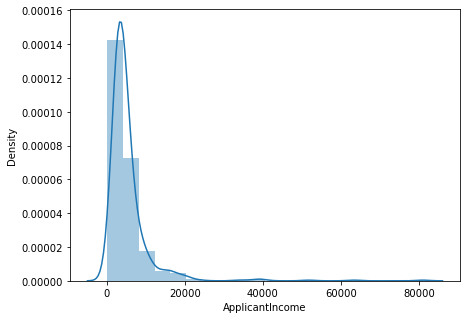

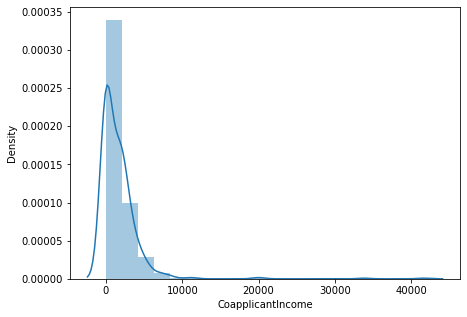

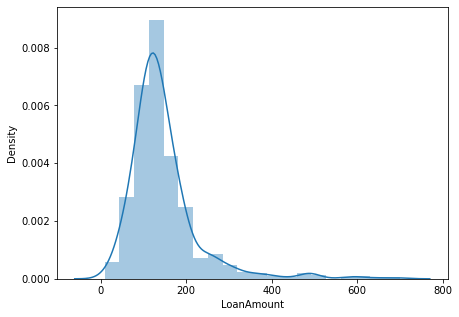

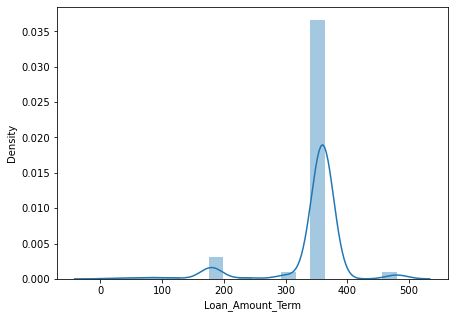

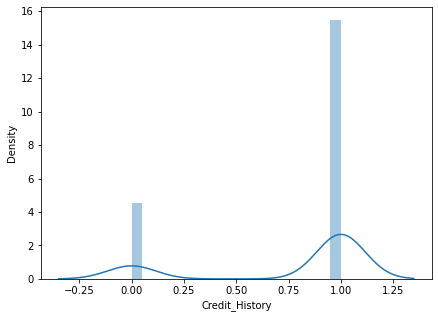

In [19]:
# plotting distplot to check the distributions of each numerical category feature

for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,bins = 20,kde=True)
    plt.show()

### Observations:-
- Most of the applicant prefer to have 360 Term plan for loan.
- Married female has higher chance for loan approval.
- The data is not normally distributed and most of the data is skewed.

## Bivariate Analysis

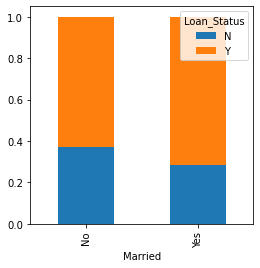

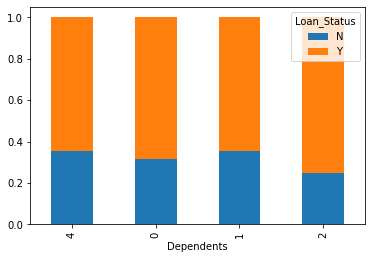

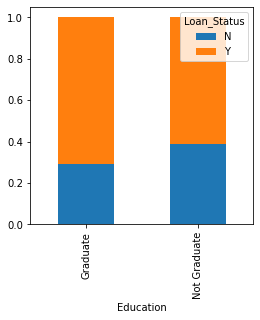

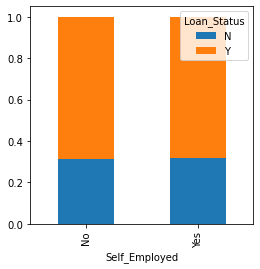

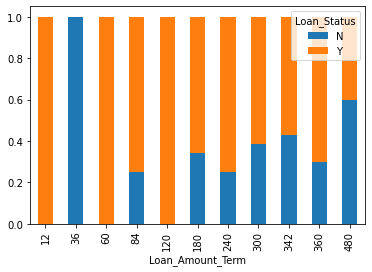

In [20]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
ct = pd.crosstab(df.Loan_Amount_Term,df.Loan_Status,normalize='index')

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

ct.plot.bar(stacked=True)
plt.show()

### Observations:-
- Married female has higher chance for loan approval.
- No. of dependents  and Self Employed doesn't effect the Loan Status.
- Graduate has little higher chances for Loan Approval.
- 36 Loan terms willface mostly rejection, whereas having 12 and 120 Loan term has a great chance for Loan approval. 36 Loan terms willface mostly rejection.

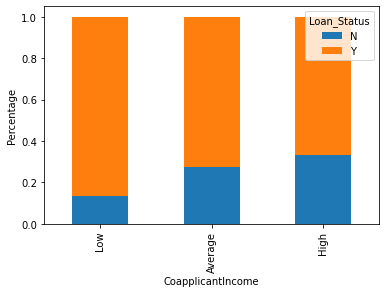

In [21]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

- Coapplicant with High Income has higher Chances for Loan Approval.

# Outlier Removal

In [22]:
from scipy.stats import zscore
z_score = zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis =1)
new_df = df[filtering_entry]


In [23]:
# Loss of data
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0]*100)

shape before         : (614, 13)
shape after          : (577, 13)
Percentage Loss      : 6.026058631921824


#### Percentage Loss : 6% data will loss after applying Zscore technique, so we will remove outlier.

In [24]:
df = new_df

## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)

df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_Income_bin
0,1,0,0,0,0,5849,0,146.412162,360,1,2,1,NaN
1,1,1,1,0,0,4583,1508,128.000000,360,1,0,0,Average
2,1,1,0,0,1,3000,0,66.000000,360,1,2,1,NaN
3,1,1,0,1,0,2583,2358,120.000000,360,1,2,1,Average
4,1,0,0,0,0,6000,0,141.000000,360,1,2,1,NaN


In [27]:
#drop Coapplicant Income Bin column
df.drop(["Coapplicant_Income_bin"],axis=1,inplace= True)

# Skewness

In [28]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- ApplicantIncome- non categorical CoapplicantIncome- non categorical Loan_Amount_Term- non categorical Credit_History- non categorical Loan_Status-Target column

- Rest features are continious feature, so skewness need not be treated.

In [29]:
#Removing skewness
#Apply yeo-johnson Power transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df['ApplicantIncome'] = scaler.fit_transform(df['ApplicantIncome'].values.reshape(-1,1))
df['CoapplicantIncome'] = scaler.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1))
df['LoanAmount'] = scaler.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = scaler.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = scaler.fit_transform(df['Credit_History'].values.reshape(-1,1))



In [30]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191870
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

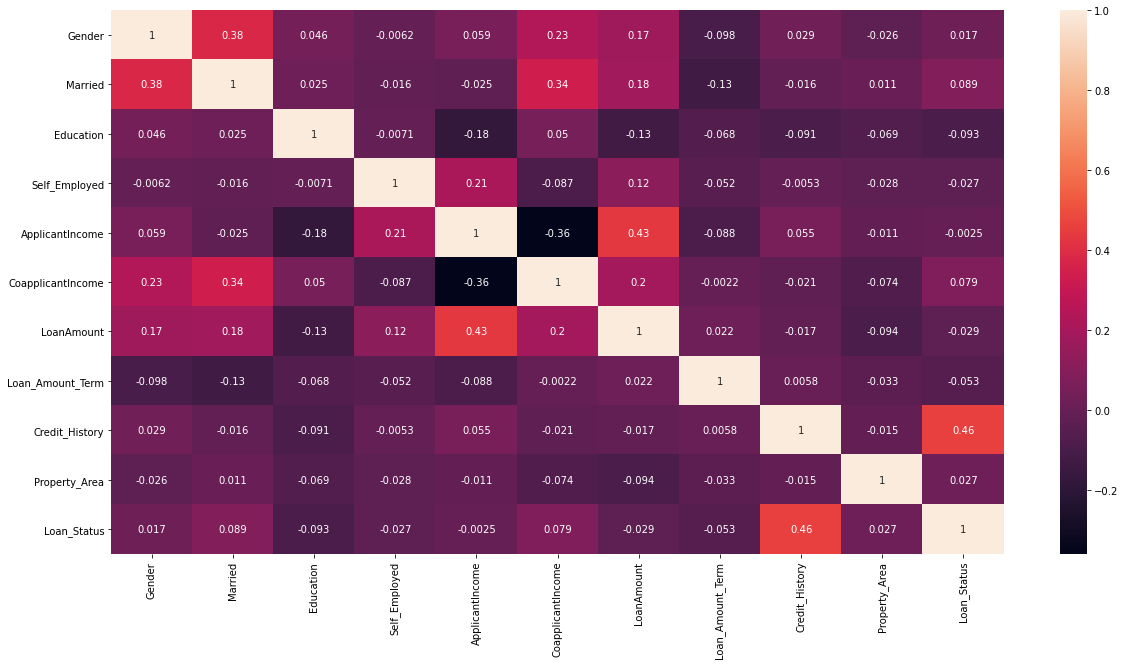

In [31]:
# let's check corelation in heat map
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

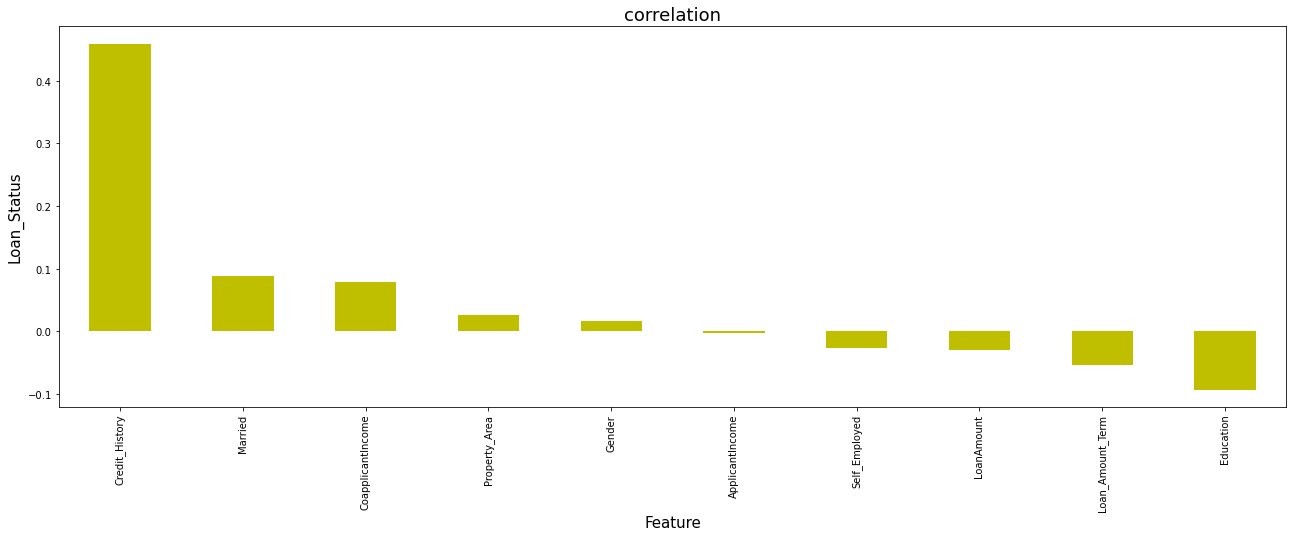

In [32]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

### None of the columns have very good correlation with our target column except Credit_History

# Preprocessing Pipeline

## SMOTE to overcome imbalance

In [33]:
# Spliting dataset into Features and Labels 
y = df['Loan_Status']
X = df.drop(columns = ['Loan_Status'])

In [34]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

#### Imbalance is treated.

# Data Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Building Machine Learning Model

In [37]:
# find the best random state

from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.7939698492462312 on Random_state 79


In [38]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)

### Logistic Regression

In [39]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7939698492462312
[[85 18]
 [23 73]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.80      0.76      0.78        96

    accuracy                           0.79       199
   macro avg       0.79      0.79      0.79       199
weighted avg       0.79      0.79      0.79       199



## DecisionTreeClassifier


In [40]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7236180904522613
[[81 22]
 [33 63]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       103
           1       0.74      0.66      0.70        96

    accuracy                           0.72       199
   macro avg       0.73      0.72      0.72       199
weighted avg       0.73      0.72      0.72       199



## RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8291457286432161
[[90 13]
 [21 75]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       103
           1       0.85      0.78      0.82        96

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



## SVC

In [54]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7688442211055276
[[81 22]
 [24 72]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       103
           1       0.77      0.75      0.76        96

    accuracy                           0.77       199
   macro avg       0.77      0.77      0.77       199
weighted avg       0.77      0.77      0.77       199



## Cross Validation Score

In [43]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

rwr=cross_val_score(DT, X, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

rwr=cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.7311792452830188
Cross validation score of DecisionTree model : 0.719874213836478
Cross validation score of RandomForest model : 0.804056603773585
Cross validation score of SVC model : 0.7311792452830188


#### Though RandomForest model is proved to be the best model, checking ROC score to select the best model.

## AUC and ROC Curve

In [44]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [45]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All models are trained")

All models are trained


In [46]:
LR.score(x_test,y_test)
DT.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)
print("ROC AUC Score of LogisticRegression model :", roc_auc_score(y_test,LR.predict(x_test)))
print("ROC AUC Score of DecisionTree model :", roc_auc_score(y_test,DT.predict(x_test)))
print("ROC AUC Score of  RandomForest model :", roc_auc_score(y_test,rf.predict(x_test)))
print("Cross validation score of SVC model :", roc_auc_score(y_test,svc.predict(x_test)))


ROC AUC Score of LogisticRegression model : 0.7928296925566343
ROC AUC Score of DecisionTree model : 0.7328074433656959
ROC AUC Score of  RandomForest model : 0.8330805016181231
Cross validation score of SVC model : 0.7682038834951456


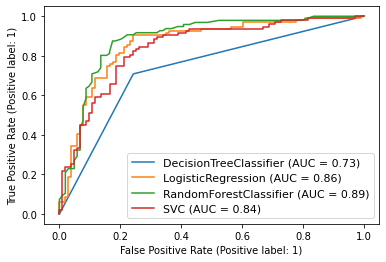

In [47]:
# Graph

disp=plot_roc_curve(DT,x_test,y_test)

plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

### RandomForest model is the best model.

# HyperParameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [49]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [50]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [51]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [55]:
#Let's train and test our model using best parameters

model=RandomForestClassifier(criterion= 'entropy',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)


print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,predrf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

82.91457286432161
Accuracy Score: 82.91457286432161%
---------------------------------------------------
roc_auc_score: 82.75182038834951%
---------------------------------------------------
Confusion Matrix : 
 [[90 13]
 [21 75]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       103
           1       0.85      0.78      0.82        96

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199

---------------------------------------------------


## ROC curve for final model

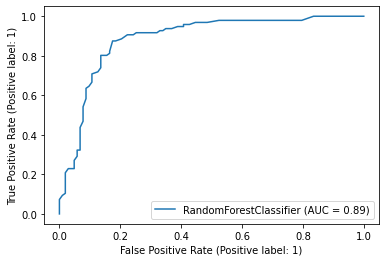

In [56]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(rf, x_test, y_test)
plt.show()

#### Great, we've improved the model's accuracy score as well as performance (AUC) by adjusting hyperparameters.

# Save the Model

In [59]:
import joblib
joblib.dump(model,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']

# Load the Model

In [60]:
Model = joblib.load("Loan Application Status Prediction.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
194,0,1
195,1,1
196,1,1
197,0,0


# Concluding Remarks

## We achieved the objective of this project  to build a model which predicts whether the applicant's loan will be approved or rejected.  Based on customer details like, Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others, our model will identify the customers segments, those are eligible for loan amount.
![thank](https://iodigitalweb.com/images/services/new/secured-loans-46014d14f8d14fceab1a0f132d01cfd2.gif)
![loan](http://northwavecredit.ltd/images/chachap%20loan.gif?crc=12755914)